 # Discussion

In [4]:
import numpy as np
import astropy.units as u
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.wcs import WCS
import random
from scipy.optimize import curve_fit
import sympy as sp

In [177]:
# 求导
x,y = sp.symbols('x,y')
f = 7.673 + 0.22 * (25.25 - 9.072 * x) ** (0.5) + 0.127 * y
fx = sp.diff(f,x)
fy = sp.diff(f,y)
print(fx)
print(fy)

-0.19859350257087*(1 - 0.359287128712871*x)**(-0.5)
0.127000000000000


# escape ability vs. BH mass

## This work

In [407]:
def LO3toLAGN(LO3):
    LO3  = np.array(LO3)
    LAGN = []
    for i in np.arange(np.shape(LO3)[0]):
        if  38<LO3[i]<40:
            LAGN_i = LO3[i] + np.log10(87)
        else:
            LAGN_i = LO3[i] + np.log10(142)
        LAGN.append(LAGN_i)
    return np.asarray(LAGN)

In [6]:
log_m = np.log10(4.74*10**9)
log_mbh = np.log10(3.67*10**5)
# L_O3 = 40.687
# L_AGN = LO3toLAGN(L_O3)
L_edd = 1.26*10**(38+log_mbh)

v50_max = -195.19065296508072
W80_max = 769.0329629067435
v80_max = 471.3168870846128
v50_ave = -114.63844426102179
W80_ave = 455.3807775179731
v80_ave = 406.98286028923377

v_circ = 148.01
v_circ_err = 6.89

v_esc,v_esc_err = 431.4, 17.9

In [7]:
L_AGN_ = 10**L_AGN
L_AGN_err = np.sqrt((np.log(10)*10**L_AGN*0.12)**2)
L_edd = 1.26*10**38*(3.67*10**5)
L_edd_err = 1.26*10**38*(0.27*10**5)
L_edd,L_edd_err
eta = L_AGN_/L_edd
eta_err =  np.sqrt((L_AGN_err/L_AGN_)**2+(L_edd_err/L_edd)**2)
eta,eta_err

NameError: name 'L_AGN' is not defined

In [12]:
M_200 = (148.01/(2.8*10**(-2)))**(1/0.316)/0.674/1.2
M_200_err = np.sqrt((364392.696258062*159.4**2.16 * v_circ_err)**2)
c_200 = 9.60*(M_200/(10**12/0.674))**(-0.075)
c_200_err = np.sqrt((-5.87421913213936*M_200**(-1.075)*M_200_err)**2)
G = 4.301*10**(-6)
H = 67.4*10**(-3)
R_200 = (M_200 * G / (100 * H**2))**(1/3)
R_200_err = np.sqrt((0.00687601052508994*M_200**(-0.666666666666667)*M_200_err)**2)
np.log10(M_200),R_200,R_200_err

(11.874225399452417, 192.0842176024637, 11.977051495302995)

In [13]:
c_200

10.105430878764961

In [381]:
R_out = 2.45
R_out_err = 0.44
F_rac = np.log(R_200/R_out)
F_rac_err = np.sqrt((R_200_err/R_200)**2 + (R_out_err/R_out))
v_esc = v_circ*np.sqrt(2*(1+np.log(R_200/R_out)))
v_esc_err = np.sqrt((v_circ_err*np.sqrt(2*F_rac+2))**2 + ((F_rac_err*v_circ)/np.sqrt(2*F_rac+2))**2)
v_esc,v_esc_err

(486.5095305885011, 83.43493885577101)

In [207]:
d_c = 10**4
r200 = 200
c = 10.19
r_s = r200/c
rho_c = 8.5*10**(-27)
# rho_r = (rho_c * d_c) / ((r/r_s)*(1+(r/r_s)**2))
r = 2.44
x = r/r_s
phi_r = -(1.5 * d_c * r_s *10**(-3) * 69.3**2 ) * ((1/(1+x)) + np.log10(x) - np.log10(1+x))


In [208]:
np.sqrt(2*phi_r)

435.0334694213992

In [209]:
v_circ*3

427.20000000000005

In [210]:
v_circ_err*3 

20.669999999999998

In [212]:
np.sqrt(29.2428516457303**2 + 20.669999999999998**2)/2

17.905259509248893

In [454]:
v_esc,v_esc_err = 431.4, 17.9

In [456]:
### error estimate 
#    SDSSJ0228 
F_out_med = v80_ave/v_esc
F_W80_med = W80_ave/v_esc
F_out_med_err = np.sqrt((v_esc_err/v_esc)**2 + (32.28247957020734/v80_ave)**2)
F_W80_med_err  = np.sqrt((v_esc_err/v_esc)**2 + (32.28247957020734/W80_ave)**2)

F_out_max = v80_max/v_esc
F_W80_max = W80_max/v_esc
F_out_max_err = np.sqrt((v_esc_err/v_esc)**2 + (50/v80_max)**2)
F_W80_max_err = np.sqrt((v_esc_err/v_esc)**2 + (55/W80_max)**2)

In [457]:
F_out_max,F_out_max_err

(1.0925287136870951, 0.11391153374107152)

In [458]:
L_AGN = 42.83928834
info_name = np.array(["W80_med","V50_med","V80_med","W80_max","V50_max","V80_max",
                      "log_Mstar","log_MBH","log_LO3","log_LAGN","V_esc","V_esc_err",
                      "f_W80_med","f_W80_med_err","f_vout_med","f_vout_med_err",
                      "f_W80_max","f_W80_max_err","f_vout_max","f_vout_max_err",])
info_array = np.array([W80_ave,v50_ave,v80_ave,W80_max,v50_max,v80_max,
                       log_m,log_mbh, L_O3,L_AGN,v_esc,v_esc_err,
                       F_W80_med,F_W80_med_err,F_out_med,F_out_med_err,
                       F_W80_max,F_W80_max_err,F_out_max,F_out_max_err,])

rdd=Table({'info_name':info_name,
           'info':info_array,})
ascii.write(rdd,'data/target_info_SDSSJ0228.txt',overwrite=1)

In [131]:
# L_Hb BLR to L_bol
Hb_region_data = fits.open('data/SDSSj0228_hb_flux.fits')
hbna_f     = Hb_region_data[1].data
hbna_f[np.isnan(hbna_f)] = 0
hbn_ferr   = Hb_region_data[2].data
hbn_ferr[np.isnan(hbn_ferr)] = 0
hbbr_f     = Hb_region_data[3].data
hbbr_f[np.isnan(hbbr_f)] = 0
hbbr_ferr  = Hb_region_data[4].data
hbbr_ferr[np.isnan(hbbr_ferr)] = 0

dist = 335.8 * 3.0856776 * 10**(24)          ## cm
L_BRL_Hb = np.nansum(hbbr_f*10**(-20)) * (4*np.pi*dist**2) *10**(0.4)
L_5100   =  (L_BRL_Hb/(1.425*10**(42)))**(1/1.33) * 10**44
L_bol    = 10*L_5100
A_r      = L_bol/L_edd
np.log10(L_bol)


43.302748816845856

### circlar velocity

In [293]:
sigma_data = ascii.read('data/Ha_sigma.txt')
sigma_gas_A = sigma_data['sigma_ha']
sigma_gas_err_A = sigma_data['sigma_ha_err']
sigma_v = sigma_gas_A/6562.8 * 3*10**5
sigma_v_err = sigma_gas_err_A/6562.8 * 3*10**5
sigma_corr = 3*10**5/2988.96822493805/2.35
sigma_v_cor = np.sqrt(sigma_v**2 - sigma_corr**2)

sigma_1 = np.flipud(sigma_v_cor[1:25])
sigma_2 = sigma_v_cor[26:]
sigma_3 = (sigma_1+sigma_2)/2
sigma_4 = np.flipud(sigma_3)
sigma_4 = np.append(sigma_4,sigma_v_cor[25])
sigma_5 = np.append(sigma_4,sigma_3)

sigma_err_1 = np.flipud(sigma_v_err[1:25])
sigma_err_2 = sigma_v_err[26:]
sigma_err_3 = np.sqrt((0.5*sigma_err_1)**2 + (0.5*sigma_err_2)**2)
sigma_err_4 = np.flipud(sigma_err_3)
sigma_err_4 = np.append(sigma_err_4,sigma_v_err[25])
sigma_err_5 = np.append(sigma_err_4,sigma_err_3)

r = np.arange(-24,25)*0.326

In [1]:
3*10**5/2988.96822493805/2.35

42.710248106010226

In [295]:
def model(x,*p):
    f = (p[0]*np.exp(-0.5*(x - p[1])**2/p[2]**2)) +p[3]
    return f

def generate_spectra(flux,error):
    
    if flux.shape[0] == error.shape[0]:
        pass
    else:
        print('flux and error must be same shape !')
        
    random_spec = []
    for i in range(flux.shape[0]):
        mu_flux = flux[i]
        sigma_flux = error[i]
        random_spec_i = random.gauss(mu_flux,sigma_flux)
        random_spec.append(random_spec_i)
        
    random_spec_v1 = np.array(random_spec)
    return random_spec_v1

Text(0.5, 0, '${\\rm R [Kpc]}$')

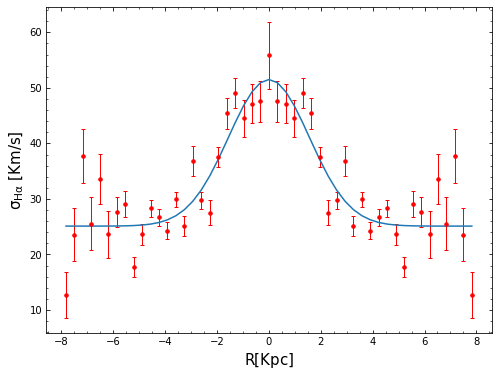

In [296]:
p = np.array([50,0,2,25])
p_bound = ([0,-5,1,10],
           [100,5,5,40])
popt_s,pcov_s = curve_fit(model,r,sigma_5,p0=p,bounds=p_bound,
                          sigma=sigma_err_5,absolute_sigma=True,maxfev=100000)

plt.figure(figsize=(8,6))
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
r = np.arange(-24,25)*0.326
plt.errorbar(r,sigma_5,yerr = sigma_err_5,fmt='r.',elinewidth=1,ms=7,capsize=2)
plt.plot(r,model(r,*popt_s))
plt.ylabel(r'${\rm \sigma_{H\alpha}\ [Km/s]}$',fontsize=15)
plt.xlabel(r'${\rm R [Kpc]}$',fontsize=15)

In [353]:
## 多次拟合求误差
def sigma_fit(r,sigma,sigma_err,r_interpolate,intr_times,p_s):
    
    sigma_list = [generate_spectra(sigma,sigma_err) for i in range(intr_times)]
    p_bound = ([0,-5,1,10],
               [100,5,5,40])
    sigma_in_list = []
    for i in range(intr_times):
        sigma_i = sigma_list[i]
        popt_i,pocv_i = curve_fit(model,r,sigma_i,p0=p_s,bounds=p_bound,
                                  sigma=sigma_err,absolute_sigma=True,maxfev=100000)
        sigma_in = model(r_interpolate,*popt_i)
        sigma_in_list.append(sigma_in)
    
    sigma_fin = []
    for i in range(21):
        sigma_j = np.array([sigma_in_list[k][i] for k in range(intr_times)])
        sigma_fin.append(sigma_j)
        
    sigma_fin = np.array(sigma_fin)
    sigma_ferr = np.array([np.std(sigma_fin[l]) for l in range(21)])
    sigma_f = np.array([np.median(sigma_fin[l]) for l in range(21)])
    
    
    return sigma_f,sigma_ferr

In [269]:
25*0.336

8.4

In [288]:
v_ha_data = ascii.read('data/Ha_rotataion_velocity.txt')
dist = 335.8 
snr_x = np.arange(-25,25,1)
kpc_perpix = (0.2/2.06e5)*dist*1.0e3
radius = np.array(v_ha_data['R(kpc)'])*(kpc_perpix/0.3) 
v_ha = np.array(v_ha_data['v_Ha_ro'])
v_ha_err = np.array(v_ha_data['v_Ha_ro_error'])

v_rot = v_ha[29:]
v_rot_err = v_ha_err[29:]
r_rot = radius[29:]

rho_gas_data = ascii.read("data/gasmass_surface_density_2model.txt")

rho_gas = rho_gas_data["SD_GAS_ep"]
rho_gas_err = rho_gas_data["SD_GAS_ep_err"]
r_gas = np.array(rho_gas_data["R"])

<ErrorbarContainer object of 3 artists>

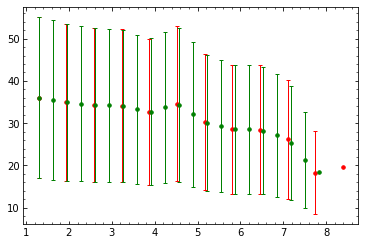

In [311]:
#####  插值
from scipy import interpolate
f = interpolate.interp1d(r_gas,rho_gas,kind='linear')
rho_gas_1 = f(r_rot)
f_err = interpolate.interp1d(r_gas,rho_gas_err,kind='linear')
rho_gas_err1 = f_err(r_rot)

# plt.plot(r_gas,rho_gas,"r.")
# plt.plot(r_rot,rho_gas_1,'b.')

plt.errorbar(r_gas,rho_gas,yerr=rho_gas_err,fmt='r.',elinewidth=1,ms=7,capsize=2)
plt.errorbar(r_rot,rho_gas_1,yerr=rho_gas_err1,fmt='g.',elinewidth=1,ms=7,capsize=2)

In [357]:
sigma_ha,sigma_ha_err = sigma_fit(r,sigma_5,sigma_err_5,r_rot,intr_times=100,p_s=popt_s)
dr = np.full_like(r_rot,(r_rot[2]-r_rot[1]))  
gs = list(0.872*rho_gas_1*sigma_ha**2)
ln_gs = np.log(gs)
dln_gs = np.array([ln_gs[i]-ln_gs[i-1] for i in np.arange(1,21)])
dln_gs = np.append(dln_gs,[-0.02607096])
v_p = np.sqrt(np.abs(-r_rot*sigma_ha**2 *(dln_gs/dr)))
v_circ = np.sqrt(v_rot**2+v_p**2)

In [362]:
### error
gs_err = np.sqrt((sigma_ha**2*rho_gas_err1)**2 + (2*sigma_ha*rho_gas_1*sigma_ha_err)**2)*0.872
ln_gs_err = np.sqrt((gs_err/gs)**2)
dln_gs_err = np.array([np.sqrt(ln_gs_err[i]**2+ln_gs_err[i-1]**2) for i in np.arange(1,21)])
dln_gs_err = np.append(dln_gs_err,0.1665243)/dr[0]
vp2_err = np.sqrt((sigma_ha**2*dln_gs_err)**2 + (2*sigma_ha*dln_gs*sigma_ha_err)**2)
v_p_err = np.sqrt((0.5*(v_p**2)**(-0.5)*vp2_err)**2)
v_circ_err = np.sqrt(np.abs(v_rot**2*v_rot_err**2 + v_p**2*v_p_err**2))/v_circ

In [363]:
rdd=Table({'R':r_rot,
           'v_p':v_p,
           'v_p_err':v_p_err,
           'v_circ':v_circ,
           'v_circ_err':v_circ_err,})
ascii.write(rdd,'data/asymmetric_draft_correction.txt',overwrite=1)

### figure


In [81]:
rot_v_data = ascii.read('analyse_data_image/SDSSJ0228/asymmetric_draft_correction.txt')
v_circ = rot_v_data["v_circ"]
v_circ_err = rot_v_data["v_circ_err"]
v_p = rot_v_data["v_p"]
v_p_err = rot_v_data["v_p_err"]

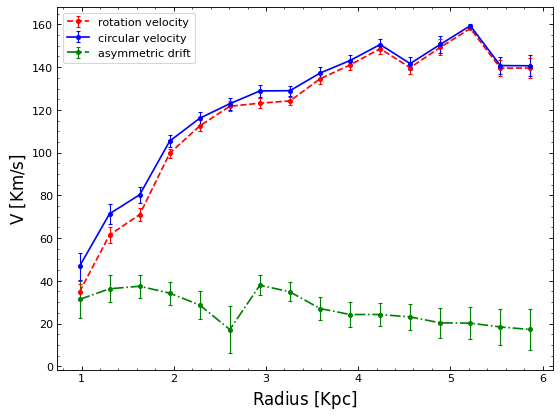

In [111]:
rot_v_data = ascii.read('analyse_data_image/SDSSJ0228/asymmetric_draft_correction.txt')

fig = plt.figure(figsize=(8,6),dpi = 80)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

plt.ylabel(r'${\rm V\ [Km/s]}$',fontsize=15)
plt.xlabel(r'${\rm Radius\ [Kpc]}$',fontsize=15)

plt.errorbar(r_rot,v_rot,yerr=v_rot_err,fmt='r.--',elinewidth=1,ms=7,capsize=2,label='rotation velocity')
plt.errorbar(r_rot,v_circ,yerr=v_circ_err,fmt='b.-',elinewidth=1,ms=7,capsize=2,label='circular velocity')
plt.errorbar(r_rot,v_p,yerr=v_p_err,fmt='g.-.',elinewidth=1,ms=7,capsize=2,label='asymmetric drift')
# plt.plot(r_rot,v_circ,'b.-',label='circular velocity')
# plt.plot(r_rot,v_rot,'r.--',label='rotation velocity')
# plt.plot(r_rot,v_p,'g.-.',label='asymmetric drift')
plt.legend()

In [474]:
vcirc = np.median(v_circ[-7:-1])
vcirc_err = np.median(v_circ_err[-7:-1])

In [473]:
v_circ_err[-7:-1]

array([2.4606947 , 2.53599598, 2.96033038, 3.80845165, 0.9276483 ,
       3.8307582 ])

In [529]:
vcirc*3

440.583139713185

## liu 2020, christina 2019

In [441]:
(3*0.2*np.log(10))/2

0.6907755278982138

In [442]:
#### low mass 
dwarf_tar = np.array(['J0842+0319','J0906+5610','J0954+4717','J1005+1257','J1009+2656'])

dwarf_v50_max = np.array([-160,-150,-80,-200,-60])
dwarf_W80_max = np.array([750,1250,1100,1200,480])
dwarf_vout_max= (-1)*dwarf_v50_max + dwarf_W80_max/2

dwarf_v50_ave = np.array([-110,-70,-60,-140,-20])
dwarf_W80_ave = np.array([500,980,730,730,210])
dwarf_vout_ave= (-1)*dwarf_v50_ave + dwarf_W80_ave/2
dwarf_vesc= np.array([299,303,317,385,241])
dwarf_vesc_err = (0.58) * dwarf_vesc
dwarf_m   = np.array([9.34 ,9.36 ,9.12 ,9.97 ,8.77 ])
dwarf_mbh = np.array([5.84, 5.4, 4.9, 4.8, 5.1])
dwarf_LO3 = np.array([40.51,41.15,41.36,40.20,40.48])
dwarf_LAGN = LO3toLAGN(dwarf_LO3)

f_W80_dwarf_med = dwarf_W80_ave/dwarf_vesc
f_W80_dwarf_med_err = np.sqrt((0.7)**2 + (0.05*dwarf_W80_ave/dwarf_W80_ave)**2)
f_vout_dwarf_med = dwarf_vout_ave/dwarf_vesc
f_vout_dwarf_med_err = np.sqrt((0.7)**2 + (0.15*dwarf_vout_ave/dwarf_vout_ave)**2)

f_W80_dwarf_max = dwarf_W80_max/dwarf_vesc
f_W80_dwarf_max_err = np.sqrt((0.7)**2 + (0.1*dwarf_W80_max/dwarf_W80_max)**2)
f_vout_dwarf_max = dwarf_vout_max/dwarf_vesc
f_vout_dwarf_max_err = np.sqrt((0.7)**2 + (0.2*dwarf_vout_max/dwarf_vout_max)**2)

In [443]:
rdd=Table({'tar_name':dwarf_tar,
           'W80_ave':dwarf_W80_ave,
           'vout_ave':dwarf_vout_ave,
           'W80_max': dwarf_W80_max,
           'vout_max': dwarf_vout_max,
           'vesc':dwarf_vesc,
           'vesc_err':dwarf_vesc_err, 
           'log_mstar':dwarf_m,
           'log_mbh':dwarf_mbh,
           'log_LO3':dwarf_LO3,
           'log_LAGN':dwarf_LAGN,
           'f_W80_med':f_W80_dwarf_med,
           'f_W80_med_err':f_W80_dwarf_med_err ,
           'f_vout_med':f_vout_dwarf_med,
           'f_vout_med_err':f_vout_dwarf_med_err,
           'f_W80_max':f_W80_dwarf_max,
           'f_W80_max_err':f_W80_dwarf_max_err ,
           'f_vout_max':f_vout_dwarf_max,
           'f_vout_max_err':f_vout_dwarf_max_err,})
ascii.write(rdd,'data/Liu2020_target_info.txt',overwrite=1)

### abundance match test


In [438]:
from AbundanceMatching import AbundanceFunction, LF_SCATTER_MULT, calc_number_densities

In [454]:
af = AbundanceFunction(lf[:,0],10**lf[:,1],(-25,-16))

## Harrison 2014

In [53]:
#### luminous AGN 

## Harrison 2014 
H_DT = np.array(['J0945+1737','J0958+1439','J1000+1242','J1010+1413','J1010+0612','J1100+0846',
                 'J1125+1239','J1130+1301','J1216+1417','J1316+1753','J1338+1503','J1339+1425',
                 'J1355+1300','J1356+1026','J1430+1339','J1504+0151'])
H_v50_max = np.array([-284,-107,-171,-350,-216,-148,-424,-173,-230,-326,-182,-178,-277,-544,-268,-520])
H_W80_max = np.array([1284,904,873,1525,1468,1367,1574,849,1456,1169,1085,724,953,964,1042,1181])
H_vout_max = (-1)*H_v50_max+H_W80_max/2
H_v50_ave = np.array([-273,-46,-58,-229,-95,-30,-265,149,124,-191,124,147,-184,-215,-152,-495])
H_W80_ave = np.array([1009,815,795,1449,1280,1066,1285,778,1228,1127,890,672,667,900,822,1184])
H_vout_ave = (-1)*H_v50_ave+H_W80_ave/2
H_LO3 = np.array([42.83,42.60,42.80,43.21,42.30,42.82,42.06,42.03,41.93,42.87,42.64,41.95,42.09,42.95,42.72,42.20])
H_LAGN = LO3toLAGN(H_LO3)

## McElroy 2015 

In [419]:
## McElroy 2015 
M_TL = np.array(['J095155','J101927','J102143','J103600','J103915','J111100',
                 'J124321','J124859_a','J130116','J133152','J141926',
                 'J142237','J143046','J150754','J151147','J152133','J152637'])
M_v50_max = -np.array([195,229,228,281,240,202,299,178,167,334,204,214,245,220,240,154,148])
M_W80_max = np.array([415,579,1152,585,1057,1116,645,1569,405,1001,529,714,687,659,528,520,517])
M_vout_max = (-1)*M_v50_max+M_W80_max/2
M_v50_ave = -np.array([37,48,60,47,96,36,72,48,60,250,60,71,25,37,36,59,37])
M_W80_ave = np.array([317,555,576,491,673,736,406,903,334,834,385,476,565,488,408,331,468])
M_vout_ave = (-1)*M_v50_ave+M_W80_ave/2
M_logm = np.array([11,11,10.8,11.2,10.5,11.4,10.8,11.2,10.8,10.9,10.9,11,11.2,10.8,10.9,11.5,10.9])
M_mbh = np.array([7.70,8.52,8.62,7.94,7.40,8.96,7.53,8.89,7.67,7.85,7.59,8.71,8.38,7.51,7.65,8.00,7.49])
M_LO3  = np.array([42.3,42.5,42.5,42.8,42.4,42.8,42.3,42.7,42.4,43.4,42.8,42.6,42.5,42.3,43.1,42.5,42.5]) 
M_LAGN = LO3toLAGN(M_LO3)
logS = 0.27*M_logm - 0.79
logS_err = np.sqrt((0.01*M_logm)**2+0.07**2)
S_err = np.sqrt((logS_err*np.log(10)*10**logS)**2)
M_vesc = 3*np.sqrt(2)*10**(logS)
M_vesc_err = 3*np.sqrt(2)*S_err

In [418]:
### error estimate 
#    McElroy et al.(2015)
f_W80_M_med = M_W80_ave/M_vesc
f_vout_M_med = M_vout_ave/M_vesc
M_err_vout_vesc_med = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_vout_ave)**2)
M_err_W80_vesc_med  = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_W80_ave)**2)

f_W80_M_max = M_W80_max/M_vesc
f_vout_M_max = M_vout_max/M_vesc
M_err_vout_vesc_max = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_vout_max)**2)
M_err_W80_vesc_max  = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_W80_max)**2)

In [420]:
rdd=Table({'tar_name':M_TL,
           'W80_ave':M_W80_ave,
           'vout_ave':M_vout_ave,
           'W80_max':M_W80_max,
           'vout_max':M_vout_max,
           'vesc':M_vesc,
           'log_mstar':M_logm,
           'log_mbh':M_mbh,
           'log_LO3':M_LO3,
           'log_LAGN':M_LAGN,
           'f_W80_med':f_W80_M_med,
           'f_W80_med_err':M_err_W80_vesc_med,
           'f_vout_med':f_vout_M_med,
           'f_vout_med_err':M_err_vout_vesc_med,
           'f_W80_max':f_W80_M_max,
           'f_W80_max_err':M_err_W80_vesc_max,
           'f_vout_max':f_vout_M_max,
           'f_vout_max_err':M_err_vout_vesc_max,})
ascii.write(rdd,'data/McElroy2015_target_info.txt',overwrite=1)

## max velocity 

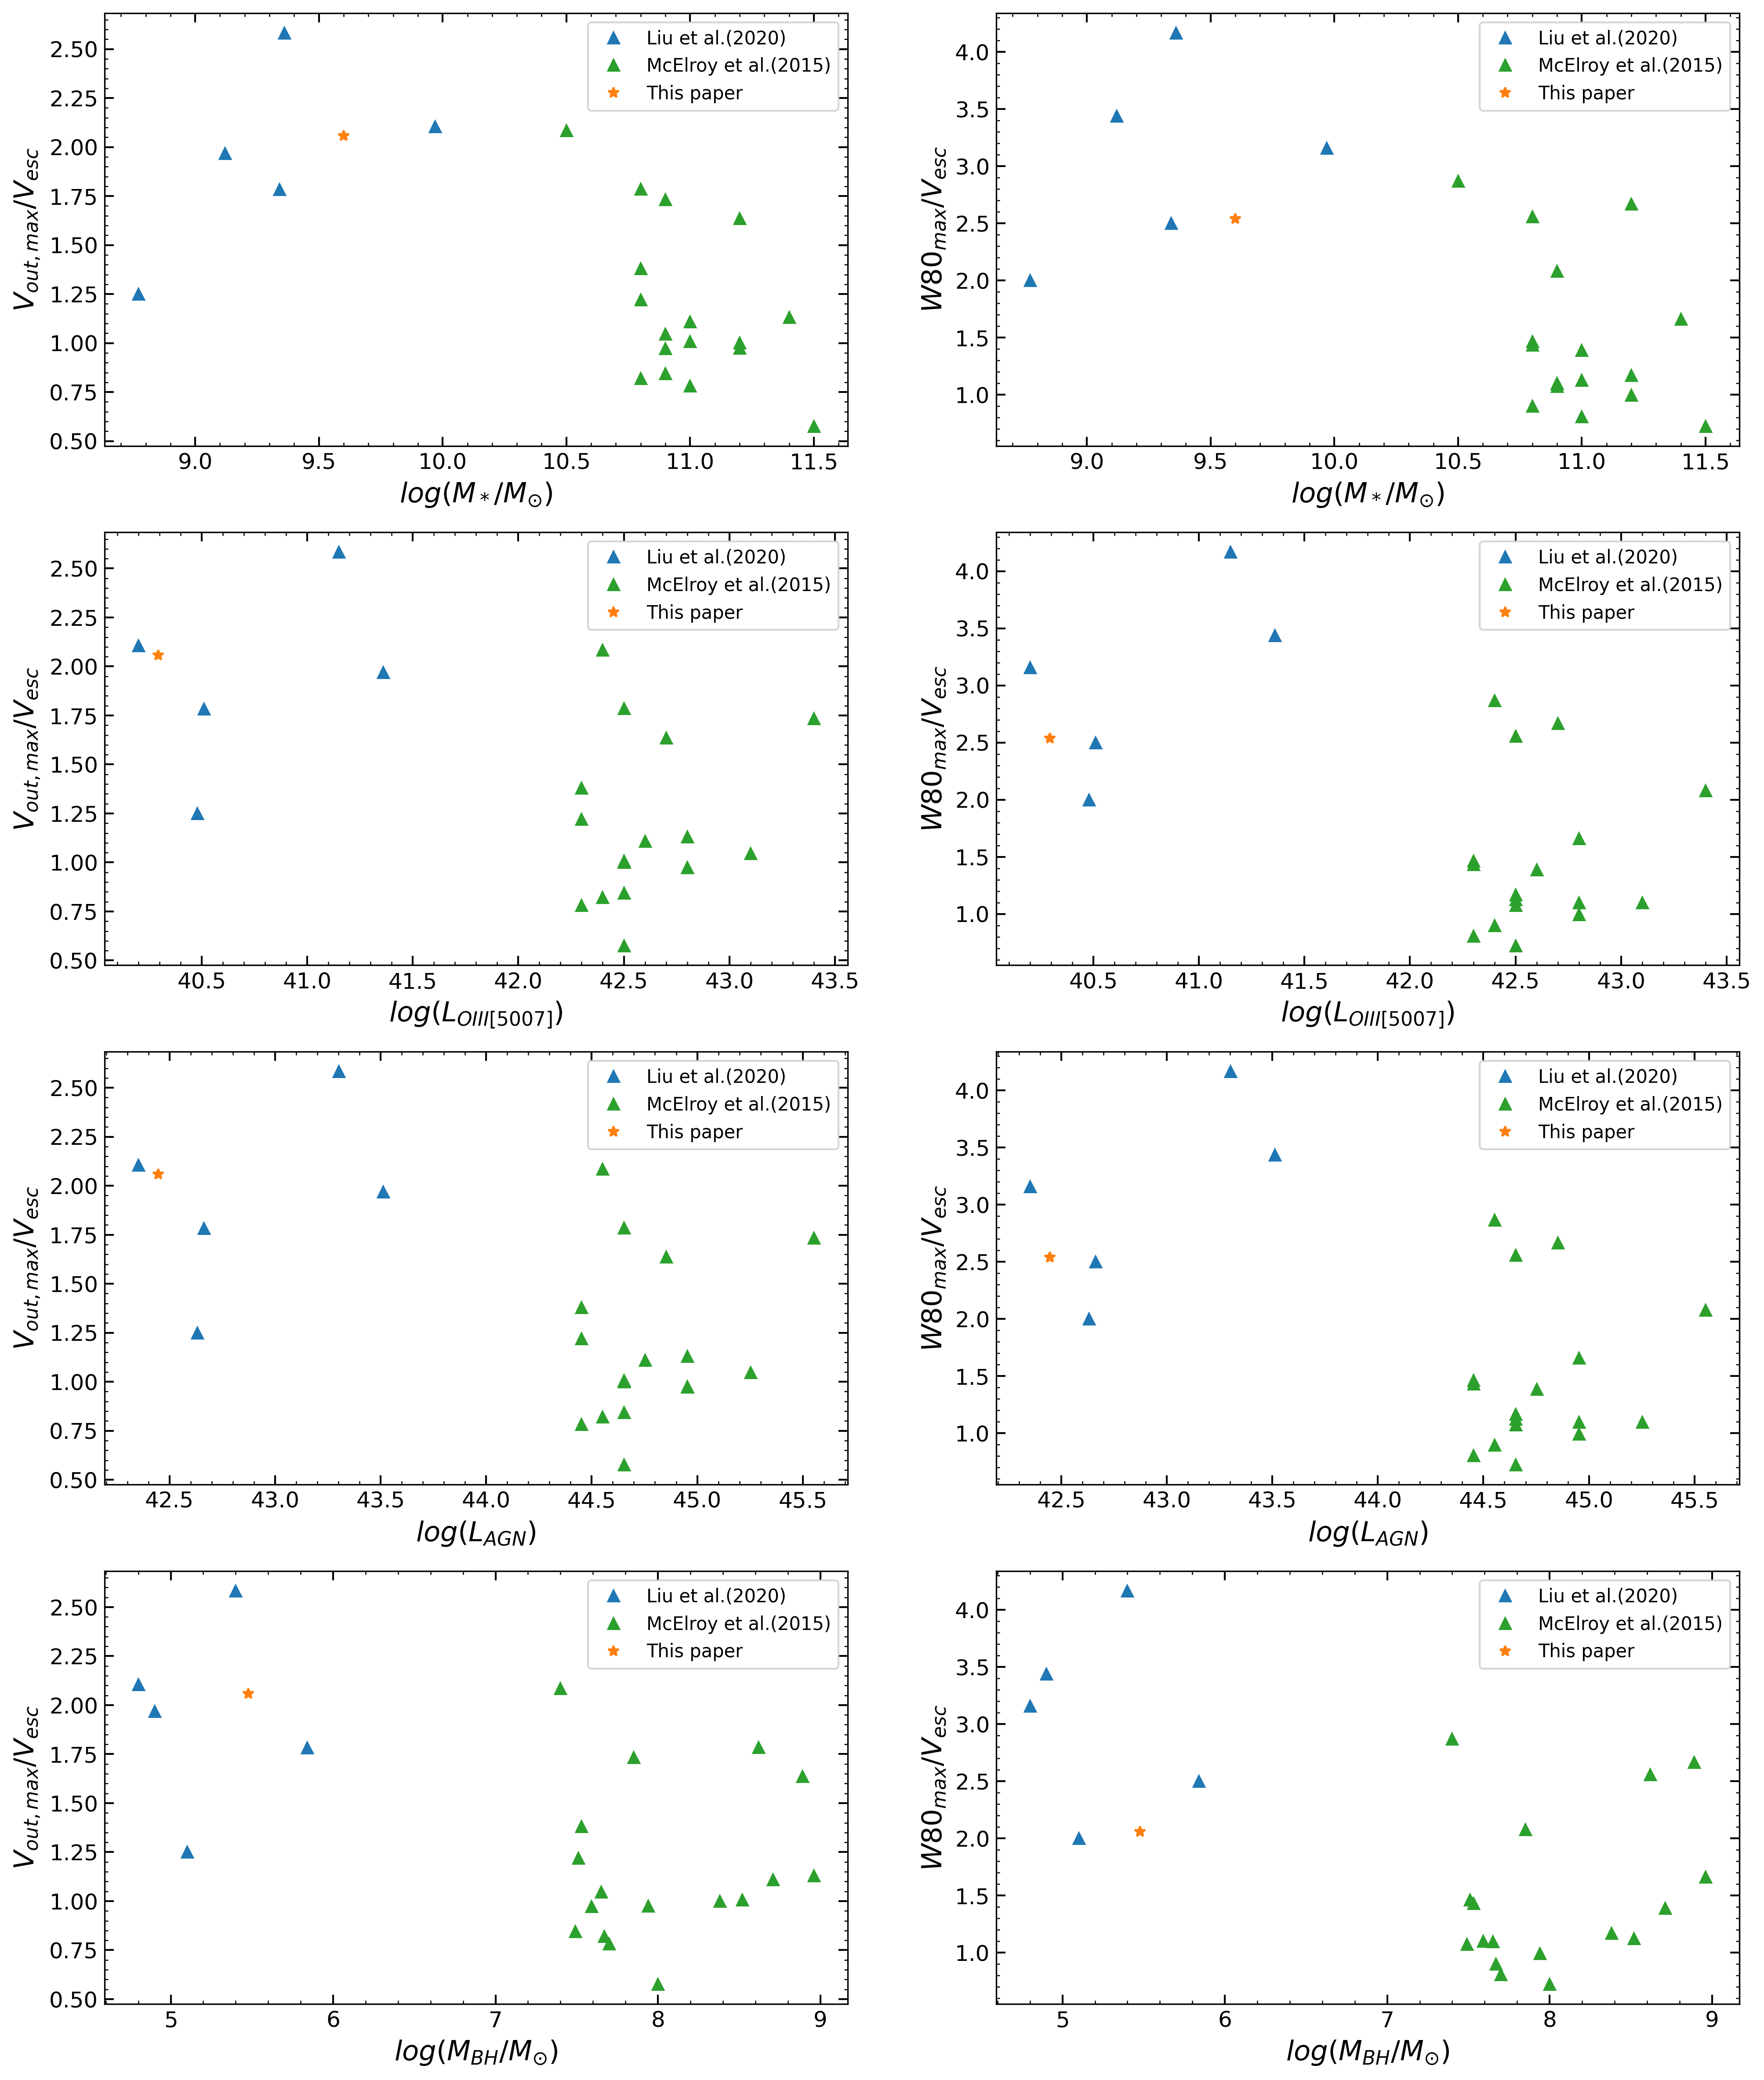

In [7]:
### fig-max-vel
fig = plt.figure(figsize=(16, 20),dpi = 300)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

ax1 = fig.add_subplot(421)
ax1.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax1.set_xlabel(r'${log(M_*/M_{\odot})}$',fontsize = 15)
ax1.set_ylabel(r'${V_{out,max}/V_{esc}}$',fontsize = 15)
ax1.plot(dwarf_m,dwarf_vout_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax1.plot(M_logm,M_vout_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax1.plot(log_m,tar_vratio_max,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax2 = fig.add_subplot(422)
ax2.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax2.set_xlabel(r'${log(M_*/M_{\odot})}$',fontsize = 15)
ax2.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax2.plot(dwarf_m,dwarf_W80_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax2.plot(M_logm,M_W80_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax2.plot(log_m,W80_max/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax3 = fig.add_subplot(423)
ax3.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax3.set_xlabel(r'${log(L_{OIII[5007]})}$',fontsize = 15)
ax3.set_ylabel(r'${V_{out,max}/V_{esc}}$',fontsize = 15)
ax3.plot(dwarf_LO3,dwarf_vout_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax3.plot(M_LO3,M_vout_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax3.plot(L_O3,tar_vratio_max,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax4 = fig.add_subplot(424)
ax4.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax4.set_xlabel(r'${log(L_{OIII[5007]})}$',fontsize = 15)
ax4.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax4.plot(dwarf_LO3,dwarf_W80_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax4.plot(M_LO3,M_W80_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax4.plot(L_O3,W80_max/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax5 = fig.add_subplot(425)
ax5.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax5.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax5.set_ylabel(r'${V_{out,max}/V_{esc}}$',fontsize = 15)
ax5.plot(dwarf_LAGN,dwarf_vout_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax5.plot(M_LAGN,M_vout_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax5.plot(L_AGN,tar_vratio_max,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax6 = fig.add_subplot(426)
ax6.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax6.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax6.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax6.plot(dwarf_LAGN,dwarf_W80_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax6.plot(M_LAGN,M_W80_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax6.plot(L_AGN,W80_max/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax7 = fig.add_subplot(427)
ax7.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax7.set_xlabel(r'${log(M_{BH}}/M_{\odot})}$',fontsize = 15)
ax7.set_ylabel(r'${V_{out,max}/V_{esc}}$',fontsize = 15)
ax7.plot(dwarf_mbh,dwarf_vout_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax7.plot(M_mbh,M_vout_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax7.plot(log_mbh,tar_vratio_max,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax8 = fig.add_subplot(428)
ax8.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax8.set_xlabel(r'${log(M_{BH}}/M_{\odot})}$',fontsize = 15)
ax8.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax8.plot(dwarf_mbh,dwarf_W80_max/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax8.plot(M_mbh,M_W80_max/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax8.plot(log_mbh,tar_vratio_max,'C1*',label = 'This paper')
plt.legend(loc='upper right')


## median velocity 

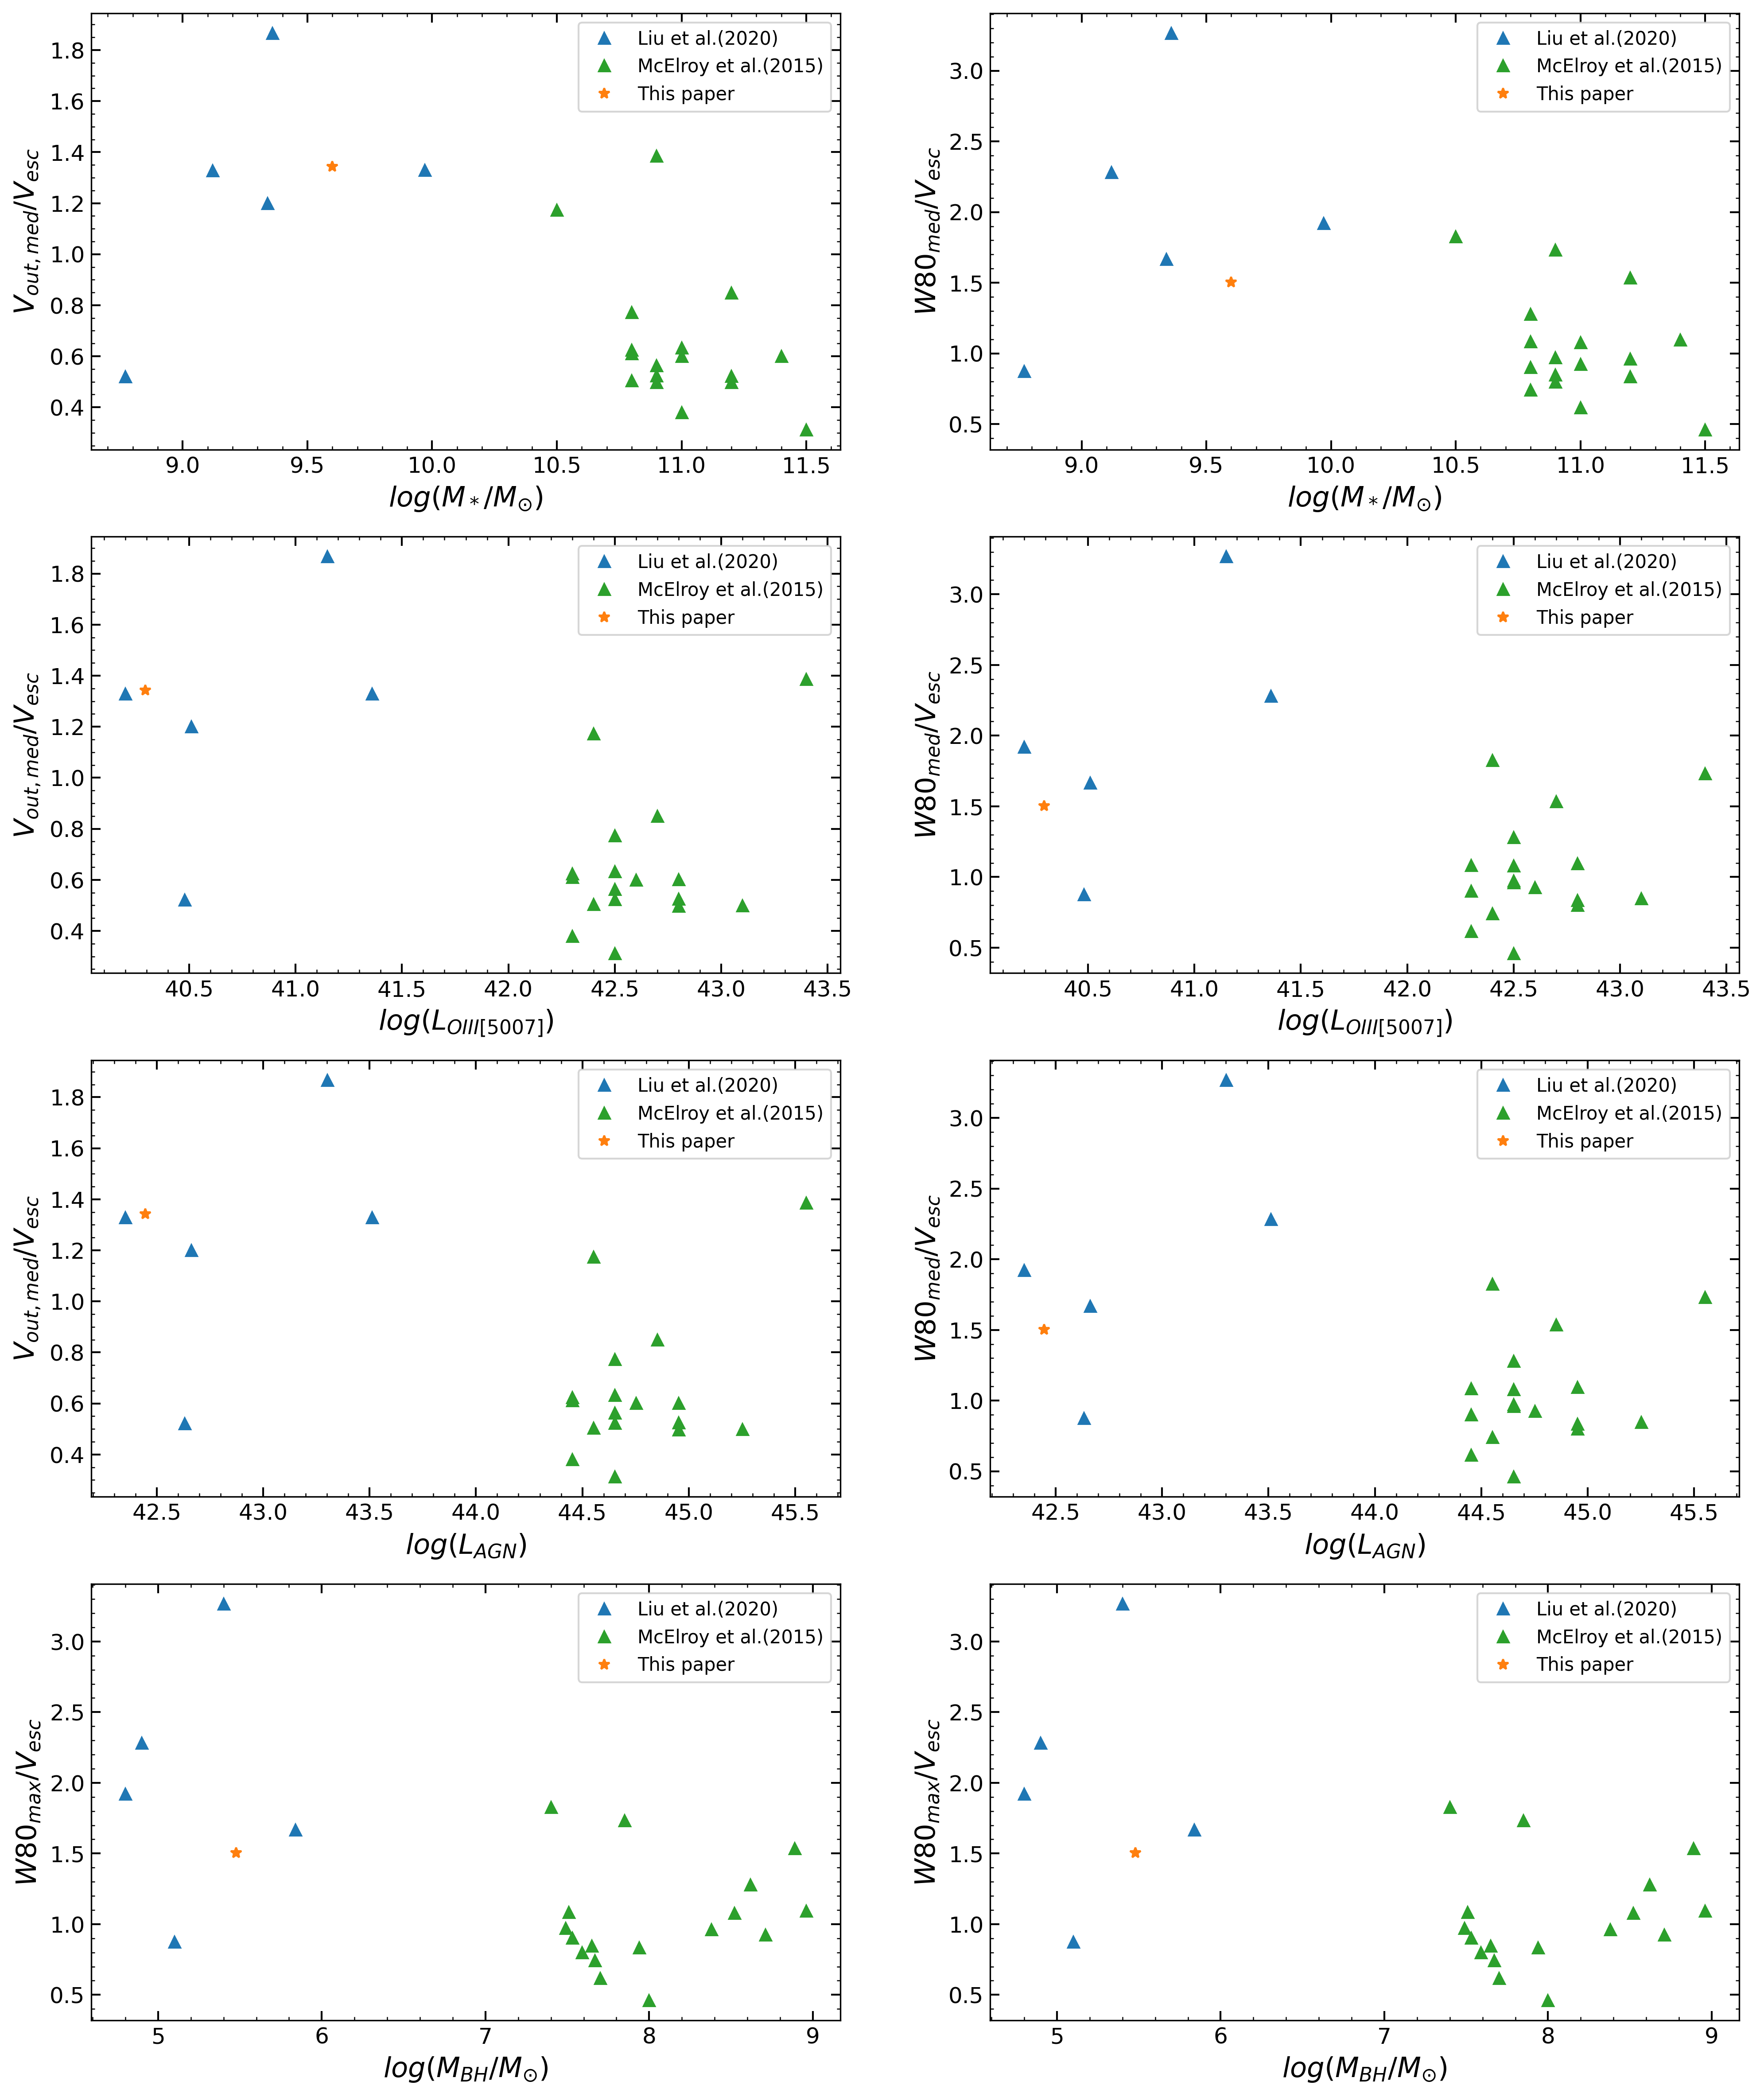

In [8]:
## fig-med-vel
fig = plt.figure(figsize=(16, 20),dpi = 300)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

ax1 = fig.add_subplot(421)
ax1.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax1.set_xlabel(r'${log(M_*/M_{\odot})}$',fontsize = 15)
ax1.set_ylabel(r'${V_{out,med}/V_{esc}}$',fontsize = 15)
ax1.plot(dwarf_m,dwarf_vout_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax1.plot(M_logm,M_vout_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax1.plot(log_m,tar_vratio_ave,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax2 = fig.add_subplot(422)
ax2.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax2.set_xlabel(r'${log(M_*/M_{\odot})}$',fontsize = 15)
ax2.set_ylabel(r'${W80_{med}/V_{esc}}$',fontsize = 15)
ax2.plot(dwarf_m,dwarf_W80_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax2.plot(M_logm,M_W80_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax2.plot(log_m,W80_ave/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax3 = fig.add_subplot(423)
ax3.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax3.set_xlabel(r'${log(L_{OIII[5007]})}$',fontsize = 15)
ax3.set_ylabel(r'${V_{out,med}/V_{esc}}$',fontsize = 15)
ax3.plot(dwarf_LO3,dwarf_vout_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax3.plot(M_LO3,M_vout_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax3.plot(L_O3,tar_vratio_ave,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax4 = fig.add_subplot(424)
ax4.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax4.set_xlabel(r'${log(L_{OIII[5007]})}$',fontsize = 15)
ax4.set_ylabel(r'${W80_{med}/V_{esc}}$',fontsize = 15)
ax4.plot(dwarf_LO3,dwarf_W80_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax4.plot(M_LO3,M_W80_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax4.plot(L_O3,W80_ave/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax5 = fig.add_subplot(425)
ax5.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax5.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax5.set_ylabel(r'${V_{out,med}/V_{esc}}$',fontsize = 15)
ax5.plot(dwarf_LAGN,dwarf_vout_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax5.plot(M_LAGN,M_vout_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax5.plot(L_AGN,tar_vratio_ave,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax6 = fig.add_subplot(426)
ax6.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax6.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax6.set_ylabel(r'${W80_{med}/V_{esc}}$',fontsize = 15)
ax6.plot(dwarf_LAGN,dwarf_W80_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax6.plot(M_LAGN,M_W80_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax6.plot(L_AGN,W80_ave/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax7 = fig.add_subplot(427)
ax7.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax7.set_xlabel(r'${log(M_{BH}}/M_{\odot})}$',fontsize = 15)
ax7.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax7.plot(dwarf_mbh,dwarf_W80_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax7.plot(M_mbh,M_W80_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax7.plot(log_mbh,W80_ave/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')

ax8 = fig.add_subplot(428)
ax8.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax8.set_xlabel(r'${log(M_{BH}}/M_{\odot})}$',fontsize = 15)
ax8.set_ylabel(r'${W80_{max}/V_{esc}}$',fontsize = 15)
ax8.plot(dwarf_mbh,dwarf_W80_ave/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax8.plot(M_mbh,M_W80_ave/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax8.plot(log_mbh,W80_ave/v_esc,'C1*',label = 'This paper')
plt.legend(loc='upper right')


## fitting

In [17]:
from scipy.optimize import curve_fit
def line_model(x,a,b):
    return a*x+b

yw80 = list(dwarf_W80_ave/dwarf_vesc)
yw80.append(W80_ave/v_esc)
yw80 = yw80+list(M_W80_ave/M_vesc)
yout = list(dwarf_vout_ave/dwarf_vesc)
yout.append(v80_ave/v_esc)
yout = yout + list(M_vout_ave/M_vesc)

x_bh = list(dwarf_mbh)
x_bh.append(log_mbh)
x_bh = x_bh+ list(M_mbh)
x_La = list(dwarf_LAGN)
x_La.append(L_AGN)
x_La = x_La + list(M_LAGN)

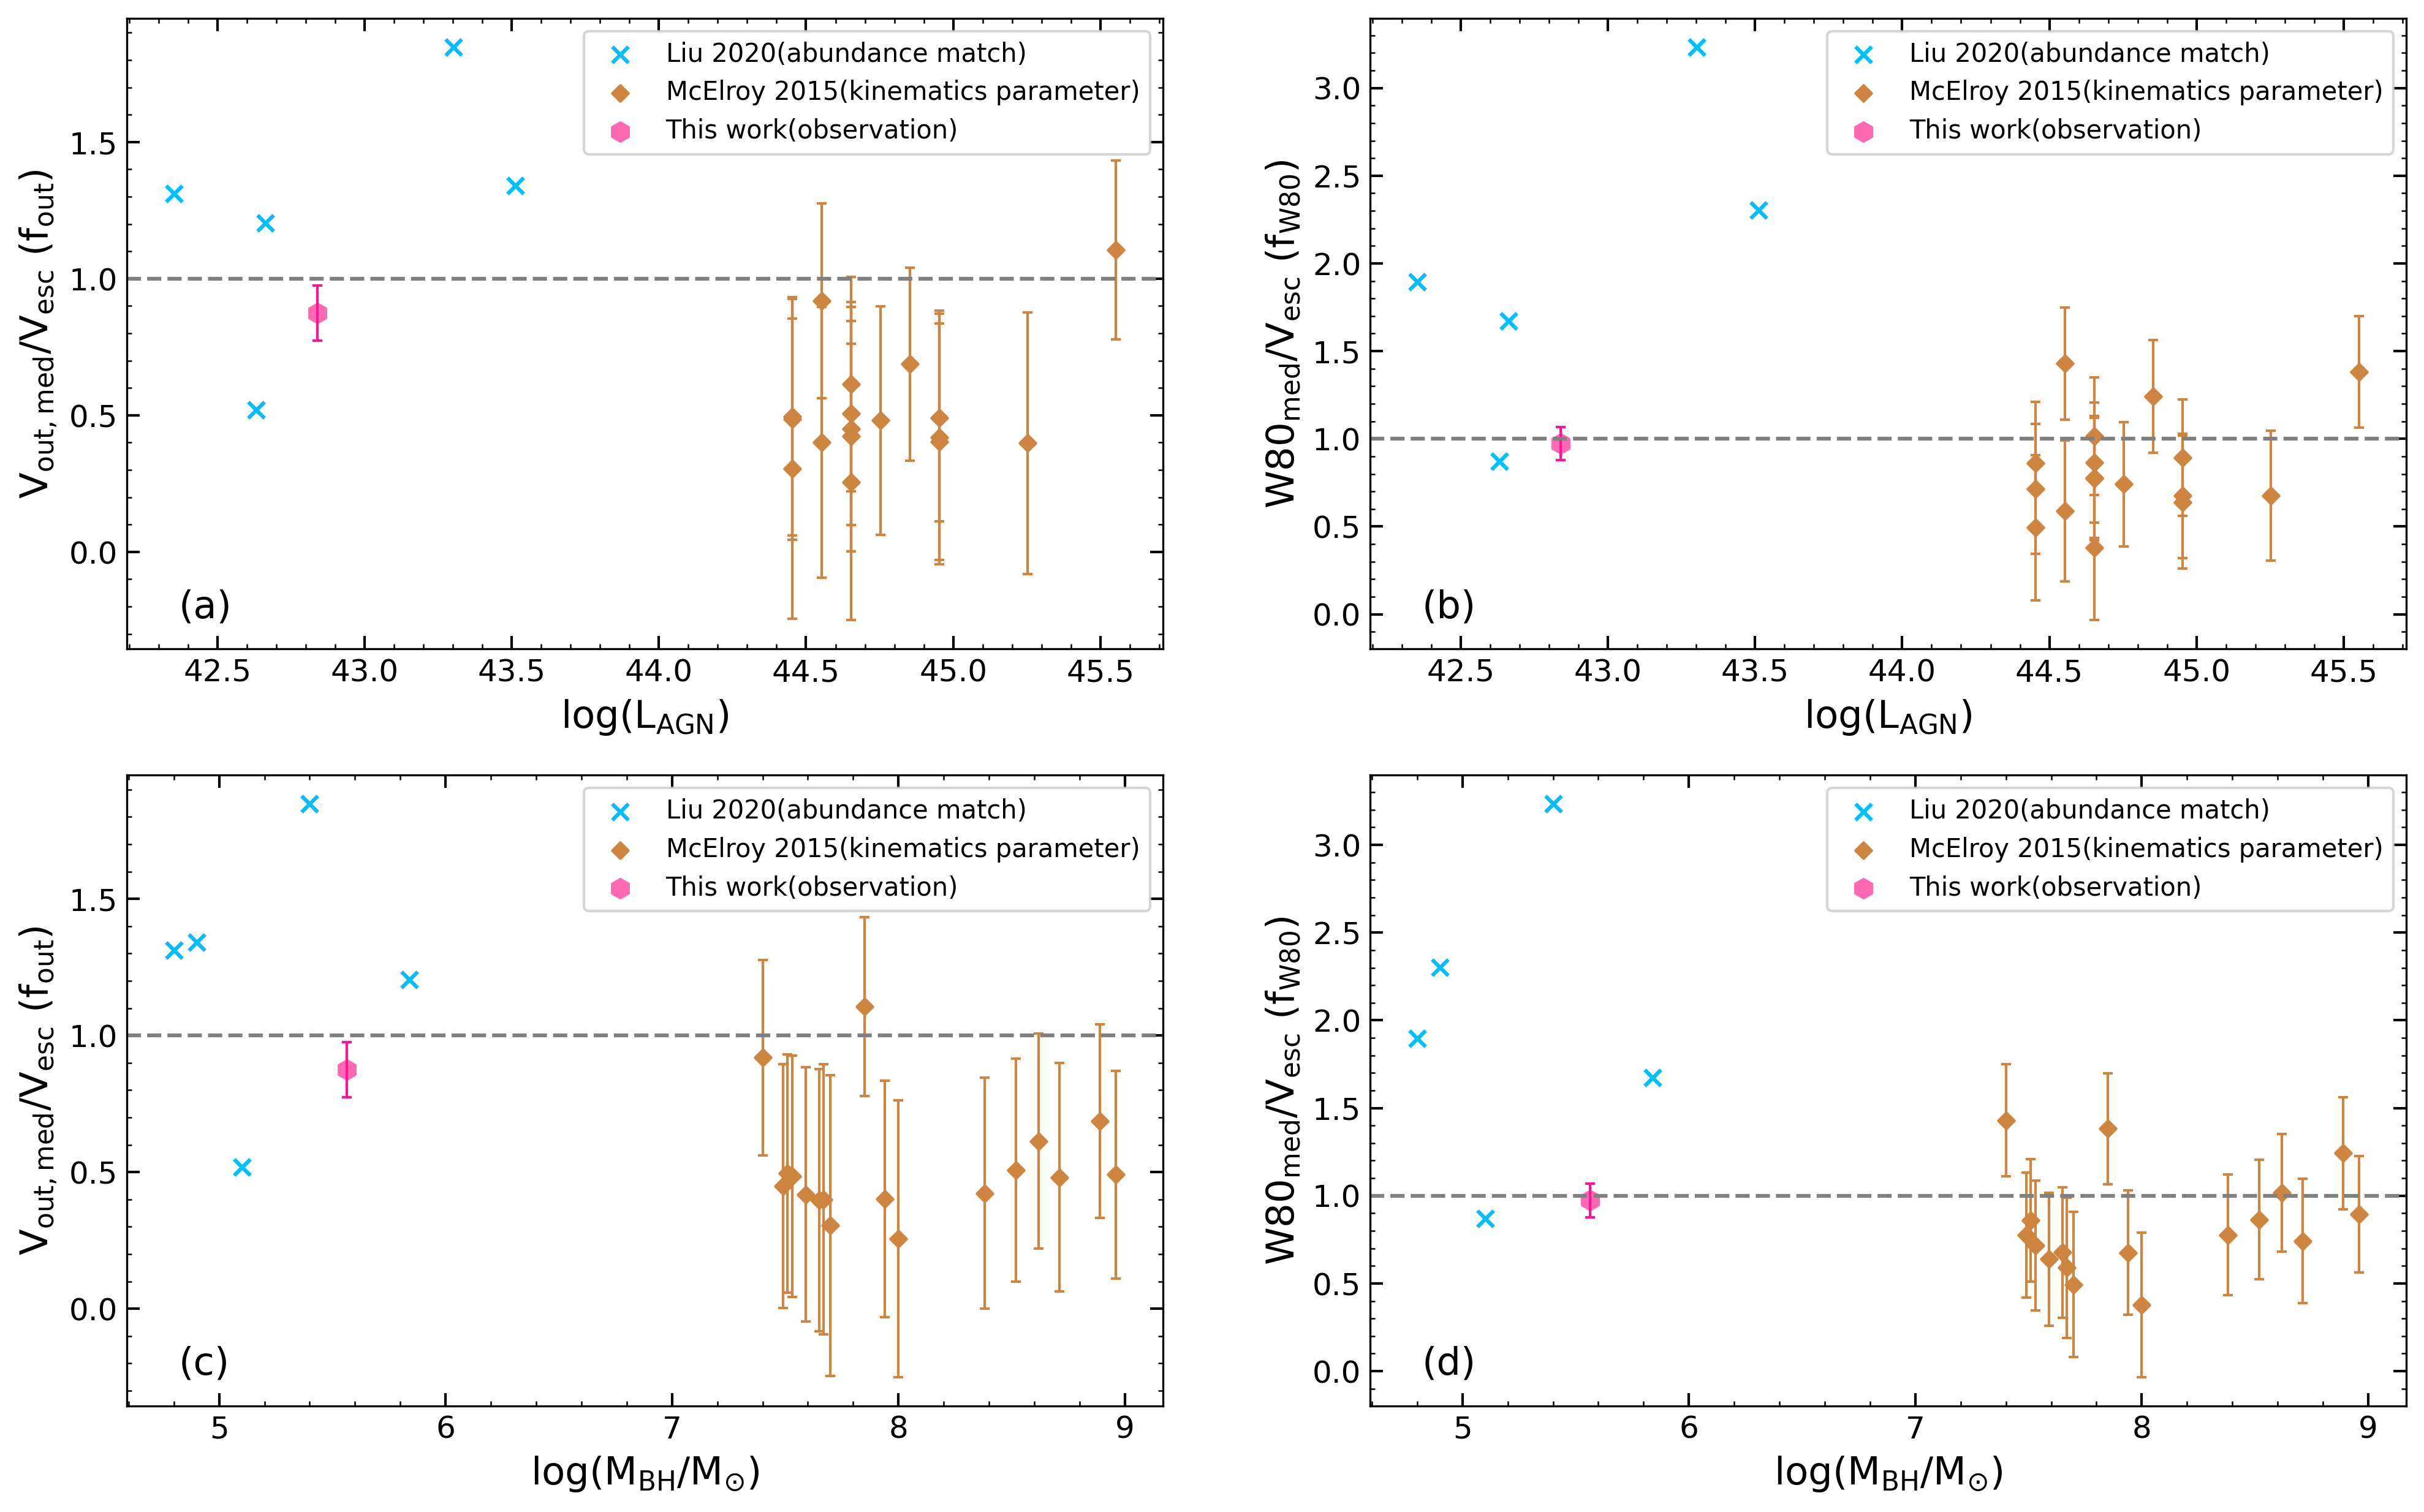

In [213]:
## fig-med-vel
fig = plt.figure(figsize=(16, 10),dpi = 300)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

ax5 = fig.add_subplot(221)
ax5.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax5.set_xlabel(r'${\rm log(L_{AGN})}$',fontsize = 15)
ax5.set_ylabel(r'${\rm V_{out,med}/V_{esc}\ (f_{out})}$',fontsize = 15)
ax5.text(0.05,0.05,'(a)',transform=ax5.transAxes,fontdict={'size': '15', 'color': 'black'})

ax5.scatter(dwarf_LAGN,dwarf_vout_ave/dwarf_vesc,c='deepskyblue',marker='x',s = 40,label = 'Liu 2020(abundance match)')

ax5.errorbar(M_LAGN,M_vout_ave/M_vesc,yerr = M_err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'peru',fmt = 'None')
ax5.scatter(M_LAGN,M_vout_ave/M_vesc,c='peru',marker='D',s = 20,label = 'McElroy 2015(kinematics parameter)')

ax5.errorbar(L_AGN,tar_vratio_ave,yerr = err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'deeppink')
ax5.scatter(L_AGN,tar_vratio_ave,c='hotpink',marker='h',s = 55,label = 'This work(observation)')
plt.axhline(y=1,color='gray',linestyle='--')

popt1, pcov1 = curve_fit(line_model, x_La, yout)
y1 = [line_model(i, popt1[0],popt1[1]) for i in x_La]
# ax5.plot(x_La,y1,'r-')

plt.legend(loc='upper right')

ax6 = fig.add_subplot(222)
ax6.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax6.set_xlabel(r'${\rm log(L_{AGN})}$',fontsize = 15)
ax6.set_ylabel(r'${\rm W80_{med}/V_{esc}\ (f_{W80})}$',fontsize = 15)
ax6.text(0.05,0.05,'(b)',transform=ax6.transAxes,fontdict={'size': '15', 'color': 'black'})

ax6.scatter(dwarf_LAGN,dwarf_W80_ave/dwarf_vesc,c='deepskyblue',marker='x',s = 40,label = 'Liu 2020(abundance match)')

ax6.errorbar(M_LAGN,M_W80_ave/M_vesc,yerr = M_err_W80_vesc,capsize=2,elinewidth=1,ecolor = 'peru',fmt = 'None')
ax6.scatter(M_LAGN,M_W80_ave/M_vesc,c='peru',marker='D',s = 20,label = 'McElroy 2015(kinematics parameter)')

ax6.errorbar(L_AGN,W80_ave/v_esc,yerr = err_W80_vesc,capsize=2,elinewidth=1,ecolor = 'deeppink')
ax6.scatter(L_AGN,W80_ave/v_esc,c='hotpink',marker='h',s = 55,label = 'This work(observation)')

plt.axhline(y=1,color='gray',linestyle='--')

popt2, pcov2 = curve_fit(line_model, x_La, yw80)
y2 = [line_model(i, popt2[0],popt2[1]) for i in x_La]
# ax6.plot(x_La,y2,'r-')

plt.legend(loc='upper right')

ax7 = fig.add_subplot(223)
ax7.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax7.set_xlabel(r'${\rm log(M_{BH}/M_{\odot})}$',fontsize = 15)
ax7.set_ylabel(r'${\rm V_{out,med}/V_{esc}\ (f_{out})}$',fontsize = 15)
ax7.text(0.05,0.05,'(c)',transform=ax7.transAxes,fontdict={'size': '15', 'color': 'black'})

ax7.scatter(dwarf_mbh,dwarf_vout_ave/dwarf_vesc,c='deepskyblue',marker='x',s = 40,label = 'Liu 2020(abundance match)')

ax7.errorbar(M_mbh,M_vout_ave/M_vesc,yerr = M_err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'peru',fmt = 'None')
ax7.scatter(M_mbh,M_vout_ave/M_vesc,c='peru',marker='D',s = 20,label = 'McElroy 2015(kinematics parameter)')

ax7.errorbar(log_mbh,tar_vratio_ave,yerr = err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'deeppink')
ax7.scatter(log_mbh,tar_vratio_ave,c='hotpink',marker='h',s = 55,label = 'This work(observation)')

plt.axhline(y=1,color='gray',linestyle='--')

popt3, pcov3 = curve_fit(line_model, x_bh, yout)
y3 = [line_model(i, popt3[0],popt3[1]) for i in x_bh]
# ax7.plot(x_bh,y3,'r-')

plt.legend(loc='upper right')

ax8 = fig.add_subplot(224)
ax8.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax8.set_xlabel(r'${\rm log(M_{BH}/M_{\odot})}$',fontsize = 15)
ax8.set_ylabel(r'${\rm W80_{med}/V_{esc}\ (f_{W80})}$',fontsize = 15)
ax8.text(0.05,0.05,'(d)',transform=ax8.transAxes,fontdict={'size': '15', 'color': 'black'})

ax8.scatter(dwarf_mbh,dwarf_W80_ave/dwarf_vesc,c='deepskyblue',marker='x',s = 40,label = 'Liu 2020(abundance match)')

ax8.errorbar(M_mbh,M_W80_ave/M_vesc,yerr = M_err_W80_vesc,capsize=2,elinewidth=1,ecolor = 'peru',fmt = 'None')
ax8.scatter(M_mbh,M_W80_ave/M_vesc,c='peru',marker='D',s = 20,label = 'McElroy 2015(kinematics parameter)')

ax8.errorbar(log_mbh,W80_ave/v_esc,yerr = err_W80_vesc,capsize=2,elinewidth=1,ecolor = 'deeppink')
ax8.scatter(log_mbh,W80_ave/v_esc,c='hotpink',marker='h',s = 55,label = 'This work(observation)')

plt.axhline(y=1,color='gray',linestyle='--')

popt4, pcov4 = curve_fit(line_model, x_bh, yw80)
y4 = [line_model(i, popt4[0],popt4[1]) for i in x_bh]
# ax8.plot(x_bh,y4,'r-')

plt.legend(loc='upper right')

# plt.savefig('discussion.pdf',dpi = 600,bbox_inches='tight')

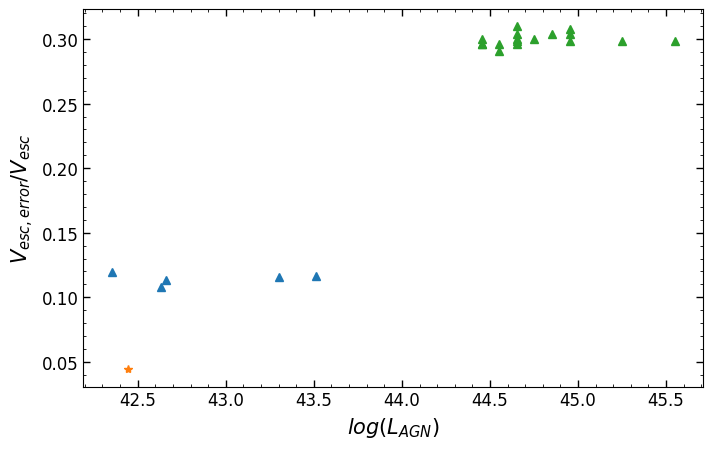

In [72]:
fig = plt.figure(figsize=(8,5),dpi = 100)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

ax1 = fig.add_subplot(111)
ax1.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax1.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax1.set_ylabel(r'${V_{esc,error}/V_{esc}}$',fontsize = 15)
ax1.plot(dwarf_LAGN,dwarf_vesc_err/dwarf_vesc,'C0^',label = 'Liu et al.(2020)')
ax1.plot(M_LAGN,M_vesc_err/M_vesc,'C2^',label = 'McElroy et al.(2015)')
ax1.plot(L_AGN,v_esc_err/v_esc,'C1*',label = 'This paper')

In [85]:
### error estimate 
#    SDSSJ0228 
vcirc = np.median(v_circ[-7:-1])
vcirc_err = 2.96033038
v_esc = vcirc*3
v_esc_err = vcirc_err*3
err_vout_vesc = np.sqrt((v_esc_err/v_esc)**2 + (32.28247957020734/v80_ave)**2)
err_W80_vesc  = np.sqrt((v_esc_err/v_esc)**2 + (32.28247957020734/W80_ave)**2)

#    McElroy et al.(2015)
M_vesc_err = M_vesc_err
M_vesc = M_vesc

M_err_vout_vesc = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_vout_ave)**2)
M_err_W80_vesc  = np.sqrt((M_vesc_err/M_vesc)**2 + (90/M_W80_ave)**2)


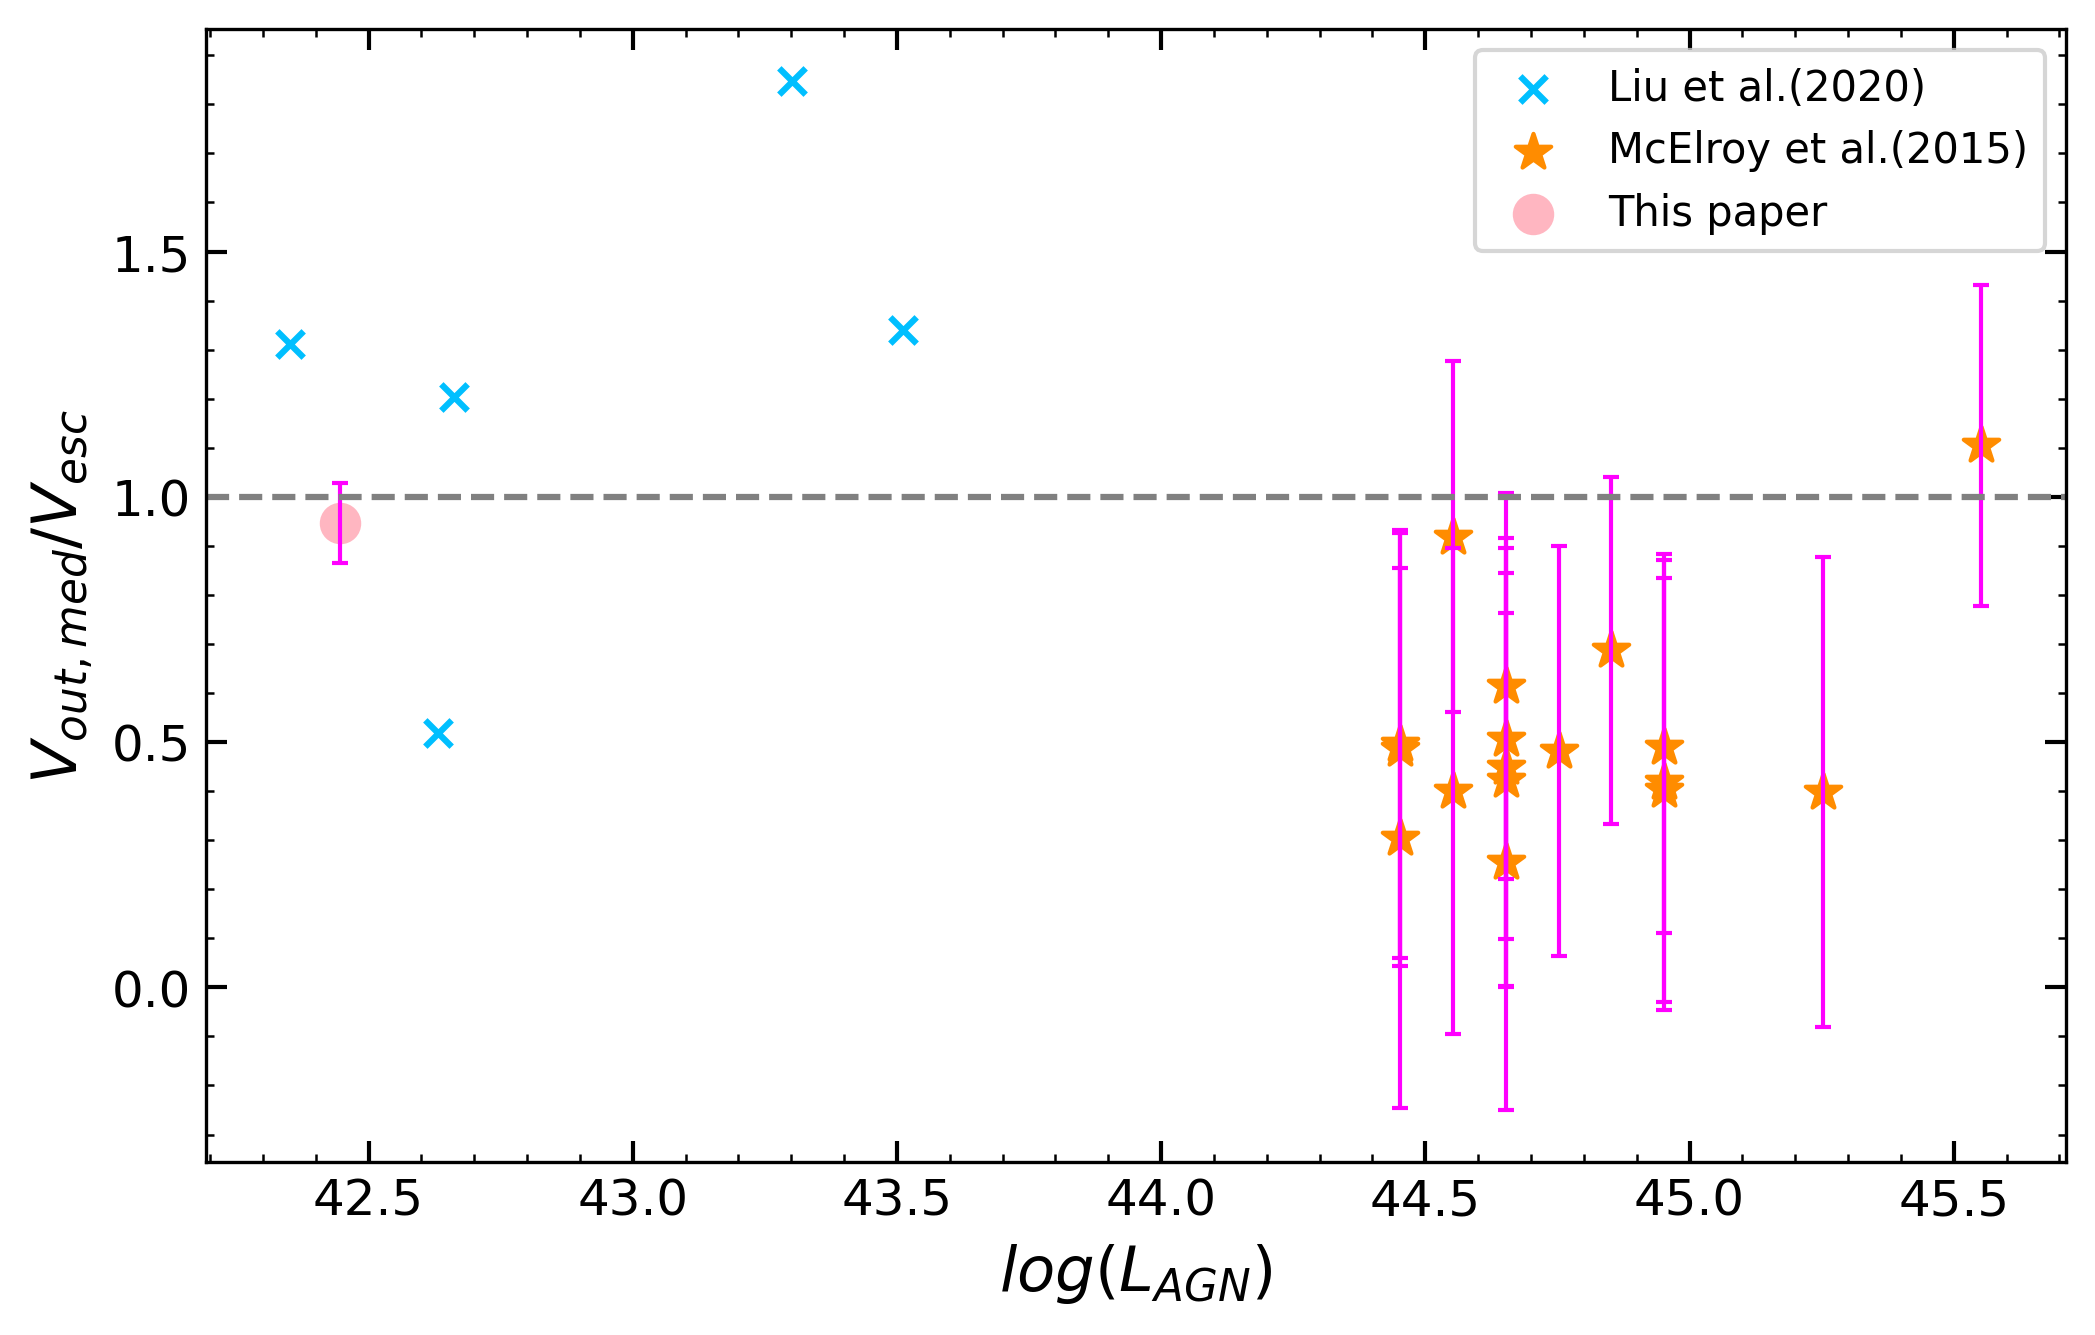

In [519]:
fig = plt.figure(figsize=(8, 5),dpi = 300)
cmap = plt.cm.get_cmap('bwr')
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

ax5 = fig.add_subplot(111)
ax5.tick_params(direction='in', labelsize = 12, length = 5, width=1.0)
ax5.set_xlabel(r'${log(L_{AGN})}$',fontsize = 15)
ax5.set_ylabel(r'${V_{out,med}/V_{esc}}$',fontsize = 15)

ax5.scatter(dwarf_LAGN,dwarf_vout_ave/dwarf_vesc,c='deepskyblue',marker='x',s = 40,label = 'Liu et al.(2020)')

ax5.errorbar(M_LAGN,M_vout_ave/M_vesc,yerr = M_err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'magenta',fmt = 'None')
ax5.scatter(M_LAGN,M_vout_ave/M_vesc,c='darkorange',marker='*',s = 80,label = 'McElroy et al.(2015)')

ax5.errorbar(L_AGN,tar_vratio_ave,yerr = err_vout_vesc,capsize=2,elinewidth=1,ecolor = 'magenta')
ax5.scatter(L_AGN,tar_vratio_ave,c='lightpink',marker='o',s = 80,label = 'This paper')

plt.axhline(y=1,color='gray',linestyle='--')

plt.legend()

In [139]:
Mw1 = 14.199
Mw2 = 13.849
-2.54*(Mw1-Mw2)-0.4*(Mw1-3.24)-0.17

-5.4426

NameError: name 'rho_c' is not defined

In [179]:
10**a

724.4359600749899